In [ ]:
#imports
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
#load csv data to df
data = pd.read_csv("../content/drive/MyDrive/ECE9063/A2/HousingPrices-Amsterdam-August-2021.csv")
data.head()

,Unnamed: 0,Address,Zip,Price,Area,Room,Lon,Lat
0,1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  924 non-null    int64  
 1   Address     924 non-null    object 
 2   Zip         924 non-null    object 
 3   Price       920 non-null    float64
 4   Area        924 non-null    int64  
 5   Room        924 non-null    int64  
 6   Lon         924 non-null    float64
 7   Lat         924 non-null    float64
dtypes: float64(3), int64(3), object(2)
memory usage: 57.9+ KB


In [ ]:
#data pre-processing
#drop first unnamed column
data= data.drop('Unnamed: 0',axis=1)
data.head()

,Address,Zip,Price,Area,Room,Lon,Lat
0,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538


In [ ]:
#extract street in Address
#remove Amsterdam in address
data['Address'] = data['Address'].apply(lambda x: str(x.split(',')[0]))

def street_extraction(string):
    list = string.split()
    word = []
    number = [] 
    for i in list:
        if i.isalpha() == True: 
            word.append(i)
        else:
            break
    word = ' '.join(word)
    return word
#extract street out
data['Street'] = data['Address'].apply(lambda x: street_extraction(x))
#drop address
data= data.drop(['Address'],axis=1)
data.head()

,Zip,Price,Area,Room,Lon,Lat,Street
0,1091 CR,685000.0,64,3,4.907736,52.356157,Blasiusstraat
1,1059 EL,475000.0,60,3,4.850476,52.348586,Kromme Leimuidenstraat
2,1097 SM,850000.0,109,4,4.944774,52.343782,Zaaiersweg
3,1060 TH,580000.0,128,6,4.789928,52.343712,Tenerifestraat
4,1036 KN,720000.0,138,5,4.902503,52.410538,Winterjanpad


In [ ]:
#split zip code and area code
data['ZipNumber'] = data['Zip'].apply(lambda x: int(x.split(' ')[0]))
data['AreaCode'] = data['Zip'].apply(lambda x: str(x.split(' ')[1]))
data= data.drop(['Zip'],axis=1)
data.head()

,Price,Area,Room,Lon,Lat,Street,ZipNumber,AreaCode
0,685000.0,64,3,4.907736,52.356157,Blasiusstraat,1091,CR
1,475000.0,60,3,4.850476,52.348586,Kromme Leimuidenstraat,1059,EL
2,850000.0,109,4,4.944774,52.343782,Zaaiersweg,1097,SM
3,580000.0,128,6,4.789928,52.343712,Tenerifestraat,1060,TH
4,720000.0,138,5,4.902503,52.410538,Winterjanpad,1036,KN


In [ ]:
#convert street and areacode to number
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
var_mod = ['Street','AreaCode']
for i in var_mod:
    data[i] = le.fit_transform(data[i])
data.head()

,Price,Area,Room,Lon,Lat,Street,ZipNumber,AreaCode
0,685000.0,64,3,4.907736,52.356157,61,1091,49
1,475000.0,60,3,4.850476,52.348586,286,1059,83
2,850000.0,109,4,4.944774,52.343782,600,1097,255
3,580000.0,128,6,4.789928,52.343712,489,1060,269
4,720000.0,138,5,4.902503,52.410538,594,1036,156


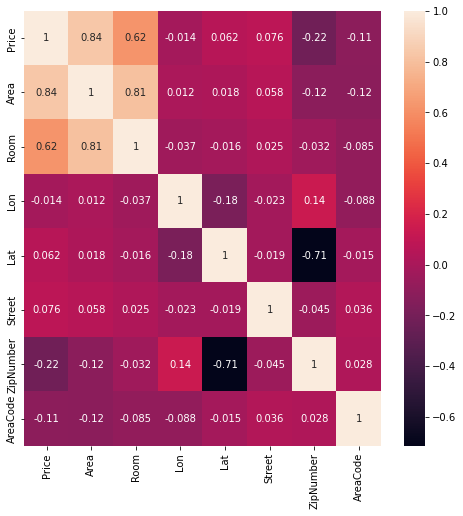

In [ ]:
#data heatmap visualization
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(), annot = True)

In [ ]:
data= data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 920 entries, 0 to 923
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      920 non-null    float64
 1   Area       920 non-null    int64  
 2   Room       920 non-null    int64  
 3   Lon        920 non-null    float64
 4   Lat        920 non-null    float64
 5   Street     920 non-null    int64  
 6   ZipNumber  920 non-null    int64  
 7   AreaCode   920 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 64.7 KB


In [ ]:
#splitting Train and Test 
from sklearn.model_selection import train_test_split
X = data.drop('Price',axis =1).values
y = data['Price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

In [ ]:
X_train[:10]

array([[5.8000000e+01, 3.0000000e+00, 4.8586390e+00, 5.2369339e+01,
        3.1400000e+02, 1.0570000e+03, 3.3900000e+02],
       [8.0000000e+01, 2.0000000e+00, 4.8988460e+00, 5.2370303e+01,
        6.0100000e+02, 1.0110000e+03, 1.1800000e+02],
       [7.8000000e+01, 3.0000000e+00, 4.9725260e+00, 5.2321871e+01,
        5.5000000e+01, 1.1030000e+03, 2.7700000e+02],
       [2.9000000e+01, 2.0000000e+00, 4.8800460e+00, 5.2384661e+01,
        1.2100000e+02, 1.0520000e+03, 0.0000000e+00],
       [2.5800000e+02, 1.0000000e+00, 4.9678970e+00, 5.2410672e+01,
        5.1000000e+02, 1.0270000e+03, 9.2000000e+01],
       [5.9000000e+01, 2.0000000e+00, 4.9753090e+00, 5.2296957e+01,
        4.4400000e+02, 1.1060000e+03, 1.0000000e+01],
       [5.0000000e+01, 3.0000000e+00, 4.8930430e+00, 5.2378440e+01,
        4.6400000e+02, 1.0150000e+03, 0.0000000e+00],
       [8.7000000e+01, 3.0000000e+00, 4.9415490e+00, 5.2377347e+01,
        0.0000000e+00, 1.0190000e+03, 1.6700000e+02],
       [3.1000000e+01, 2

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
# reshape 1d arrays to 2d arrays
y_train = y_train.reshape(len(y_train), 1)
y_test = y_test.reshape(len(y_test), 1)
scaler.fit(y_train)
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

Multiple Linear Regressions

In [ ]:
#train
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
#predicting the test set result
y_pred = regressor.predict(X_test)

In [ ]:
#compare
LR = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
LR[:10]

,Actual,Predicted
0,1249000.0,1.787693e+06
1,550000.0,5.296831e+05
2,215000.0,1.447730e+05
3,280000.0,5.310145e+05
4,350000.0,3.969411e+05
5,245000.0,3.995623e+05
6,325000.0,6.092670e+05
7,325000.0,2.764231e+05
8,549001.0,5.979456e+05
9,800000.0,5.851256e+05


MAE: 174945.01175756456
MSE: 91700024193.85019
RMSE: 302820.11854209786
VarScore: 0.6990415594238859


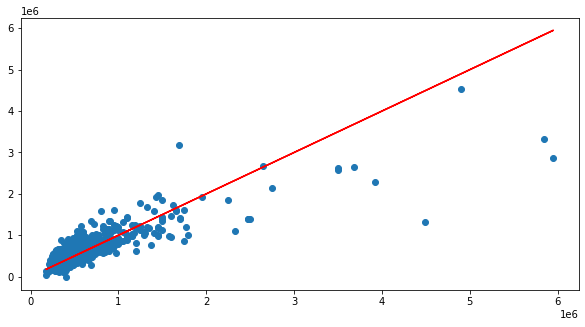

In [ ]:
#evaluate Matrix
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))

# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
# Perfect predictions
plt.plot(y_test,y_test,'r')

Keras Regressions

In [ ]:
# Creating a Neural Network Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
# start with 7 neurons a, 3 hidden layers and 1 output layer
model = Sequential()
model.add(Dense(7,activation='relu'))
model.add(Dense(7,activation='relu'))
model.add(Dense(7,activation='relu'))
model.add(Dense(7,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='Adam',loss='mse')

In [ ]:
#train
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          epochs=400)
model.summary()

Epoch 1/400
6/6 [==============================] - 1s 45ms/step - loss: 648425832448.0000 - val_loss: 684314394624.0000
Epoch 2/400
6/6 [==============================] - 0s 19ms/step - loss: 648417312768.0000 - val_loss: 684306268160.0000
Epoch 3/400
6/6 [==============================] - 0s 11ms/step - loss: 648409186304.0000 - val_loss: 684300173312.0000
Epoch 4/400
6/6 [==============================] - 0s 19ms/step - loss: 648404140032.0000 - val_loss: 684295454720.0000
Epoch 5/400
6/6 [==============================] - 0s 14ms/step - loss: 648399028224.0000 - val_loss: 684290146304.0000
Epoch 6/400
6/6 [==============================] - 0s 19ms/step - loss: 648393064448.0000 - val_loss: 684283920384.0000
Epoch 7/400
6/6 [==============================] - 0s 14ms/step - loss: 648384610304.0000 - val_loss: 684270944256.0000
Epoch 8/400
6/6 [==============================] - 0s 20ms/step - loss: 648368029696.0000 - val_loss: 684251611136.0000
Epoch 9/400
6/6 [=======================

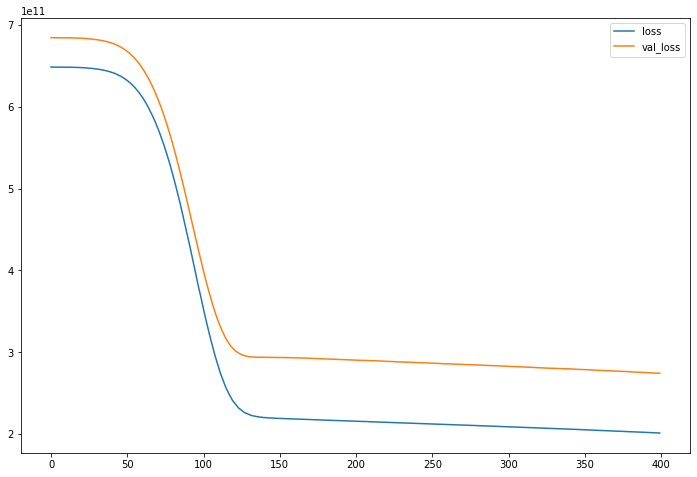

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))

MAE: 309779.6388841712
MSE: 274324783481.85995
RMSE: 523760.2347275516
VarScore: 0.10241220401439166


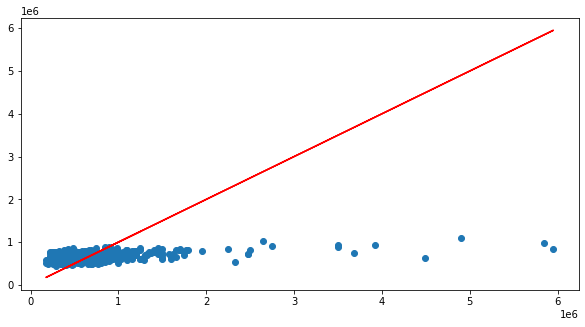

In [ ]:
y_pred = model.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
# Perfect predictions
plt.plot(y_test,y_test,'r')

In [ ]:
pip install -q -U keras-tuner

     |████████████████████████████████| 98 kB 3.6 MB/s 


In [ ]:
import keras_tuner as kt
from keras_tuner.tuners import RandomSearch

In [ ]:
def model_builder(hp):
  model = Sequential()
  # Tune the number of units and activation functions in the inout and hidden layer
  # Choose an optimal value between 7-32
  for i in range(hp.Int('layers', 3, 6)):
    model.add(Dense(units=hp.Int('units_' + str(i), 7, 32, step=2),
                                    activation=hp.Choice('act_' + str(i), ['relu', 'sigmoid', 'tanh'])))
  model.add(Dense(1, activation='softmax'))
  model.compile('adam', 'sparse_categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
tuner = RandomSearch(
    model_builder,
    objective = 'val_accuracy',
    max_trials = 4,
    executions_per_trial = 2,
)

INFO:tensorflow:Reloading Oracle from existing project ./untitled_project/oracle.json


In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 7
layers (Int)
{'default': None, 'conditions': [], 'min_value': 3, 'max_value': 6, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 7, 'max_value': 32, 'step': 2, 'sampling': None}
act_0 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'sigmoid', 'tanh'], 'ordered': False}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 7, 'max_value': 32, 'step': 2, 'sampling': None}
act_1 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'sigmoid', 'tanh'], 'ordered': False}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 7, 'max_value': 32, 'step': 2, 'sampling': None}
act_2 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'sigmoid', 'tanh'], 'ordered': False}


In [ ]:
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

In [ ]:
tuner2.results_summary()

Model tuning

In [ ]:
# increase to 17 neurons, 4 hidden layers and 1 output layer
model = Sequential()
model.add(Dense(17,activation='relu'))
model.add(Dense(17,activation='relu'))
model.add(Dense(17,activation='relu'))
model.add(Dense(17,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='Adam',loss='mse')
#train
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          epochs=400)
model.summary()

Epoch 1/400
6/6 [==============================] - 1s 35ms/step - loss: 648585609216.0000 - val_loss: 684439764992.0000
Epoch 2/400
6/6 [==============================] - 0s 13ms/step - loss: 648526626816.0000 - val_loss: 684390023168.0000
Epoch 3/400
6/6 [==============================] - 0s 20ms/step - loss: 648480620544.0000 - val_loss: 684352995328.0000
Epoch 4/400
6/6 [==============================] - 0s 18ms/step - loss: 648444837888.0000 - val_loss: 684317278208.0000
Epoch 5/400
6/6 [==============================] - 0s 10ms/step - loss: 648409645056.0000 - val_loss: 684284313600.0000
Epoch 6/400
6/6 [==============================] - 0s 19ms/step - loss: 648376418304.0000 - val_loss: 684255084544.0000
Epoch 7/400
6/6 [==============================] - 0s 11ms/step - loss: 648347189248.0000 - val_loss: 684227493888.0000
Epoch 8/400
6/6 [==============================] - 0s 18ms/step - loss: 648318615552.0000 - val_loss: 684197740544.0000
Epoch 9/400
6/6 [=======================

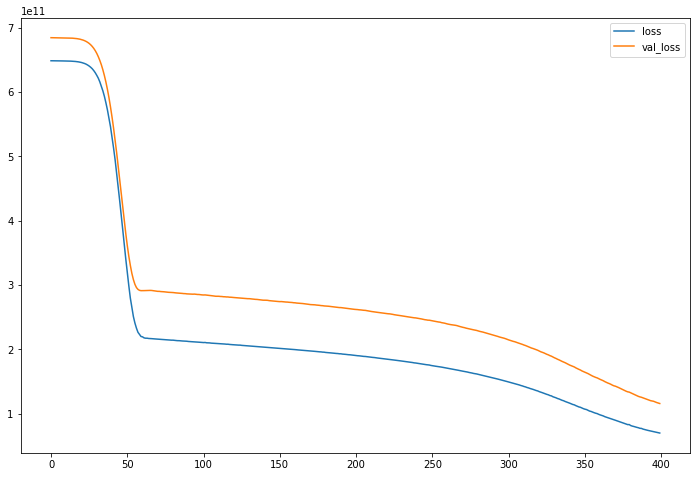

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))

MAE: 191094.7790845788
MSE: 115866989423.5818
RMSE: 340392.40506154334
VarScore: 0.6226691294068468


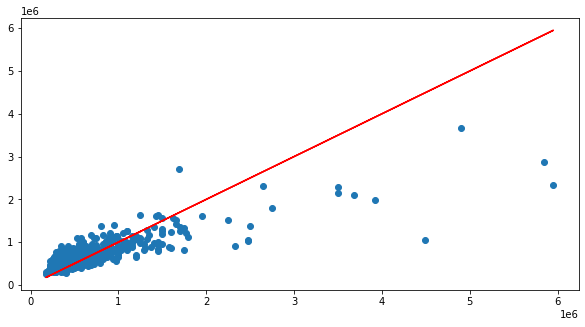

In [ ]:
y_pred = model.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
# Perfect predictions
plt.plot(y_test,y_test,'r')

In [ ]:
# increase to 600 epochs
model = Sequential()
model.add(Dense(17,activation='relu'))
model.add(Dense(17,activation='relu'))
model.add(Dense(17,activation='relu'))
model.add(Dense(17,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='Adam',loss='mse')
#train
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          epochs=600)
model.summary()

Epoch 1/600
6/6 [==============================] - 1s 42ms/step - loss: 648520597504.0000 - val_loss: 684372983808.0000
Epoch 2/600
6/6 [==============================] - 0s 19ms/step - loss: 648458731520.0000 - val_loss: 684318392320.0000
Epoch 3/600
6/6 [==============================] - 0s 11ms/step - loss: 648404860928.0000 - val_loss: 684268453888.0000
Epoch 4/600
6/6 [==============================] - 0s 19ms/step - loss: 648349745152.0000 - val_loss: 684213862400.0000
Epoch 5/600
6/6 [==============================] - 0s 18ms/step - loss: 648290500608.0000 - val_loss: 684148260864.0000
Epoch 6/600
6/6 [==============================] - 0s 12ms/step - loss: 648215658496.0000 - val_loss: 684074729472.0000
Epoch 7/600
6/6 [==============================] - 0s 18ms/step - loss: 648132755456.0000 - val_loss: 683981209600.0000
Epoch 8/600
6/6 [==============================] - 0s 11ms/step - loss: 648022458368.0000 - val_loss: 683862720512.0000
Epoch 9/600
6/6 [=======================

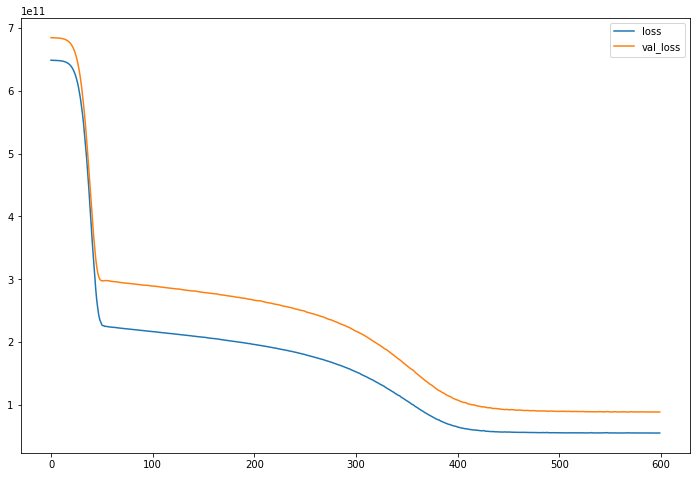

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))

MAE: 168153.31852921195
MSE: 88833640366.43332
RMSE: 298049.7280093262
VarScore: 0.7085113277609092


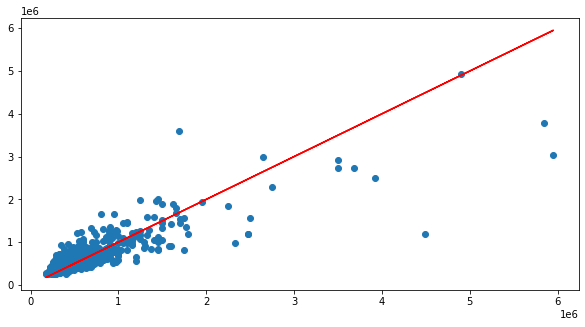

In [ ]:
y_pred = model.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
# Perfect predictions
plt.plot(y_test,y_test,'r')

In [ ]:
# set the batch size from default 32 to 16
model = Sequential()
model.add(Dense(17,activation='relu'))
model.add(Dense(17,activation='relu'))
model.add(Dense(17,activation='relu'))
model.add(Dense(17,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='Adam',loss='mse')
#train
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=16,epochs=600)
model.summary()

Epoch 1/600
12/12 [==============================] - 1s 21ms/step - loss: 648382382080.0000 - val_loss: 684233326592.0000
Epoch 2/600
12/12 [==============================] - 0s 9ms/step - loss: 648293122048.0000 - val_loss: 684130631680.0000
Epoch 3/600
12/12 [==============================] - 0s 9ms/step - loss: 648171290624.0000 - val_loss: 683990056960.0000
Epoch 4/600
12/12 [==============================] - 0s 9ms/step - loss: 647995654144.0000 - val_loss: 683777130496.0000
Epoch 5/600
12/12 [==============================] - 0s 10ms/step - loss: 647720599552.0000 - val_loss: 683442765824.0000
Epoch 6/600
12/12 [==============================] - 0s 8ms/step - loss: 647309885440.0000 - val_loss: 682911662080.0000
Epoch 7/600
12/12 [==============================] - 0s 9ms/step - loss: 646618546176.0000 - val_loss: 682068213760.0000
Epoch 8/600
12/12 [==============================] - 0s 7ms/step - loss: 645531500544.0000 - val_loss: 680739667968.0000
Epoch 9/600
12/12 [===========

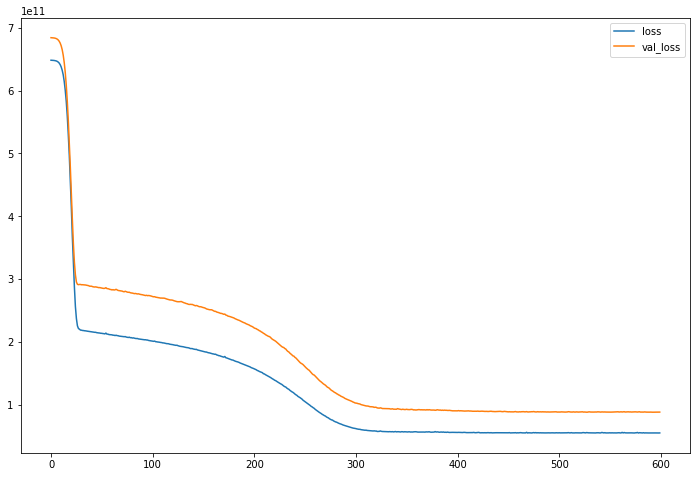

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))

MAE: 167454.1340013587
MSE: 88432229597.52695
RMSE: 297375.5699406509
VarScore: 0.7096142049538838


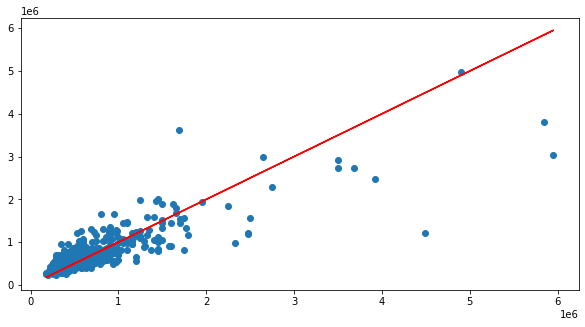

In [ ]:
y_pred = model.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
# Perfect predictions
plt.plot(y_test,y_test,'r')

Epoch 1/600
12/12 [==============================] - 1s 20ms/step - loss: 648448049152.0000 - val_loss: 684340019200.0000
Epoch 2/600
12/12 [==============================] - 0s 9ms/step - loss: 648446607360.0000 - val_loss: 684338708480.0000
Epoch 3/600
12/12 [==============================] - 0s 8ms/step - loss: 648445231104.0000 - val_loss: 684337528832.0000
Epoch 4/600
12/12 [==============================] - 0s 7ms/step - loss: 648444116992.0000 - val_loss: 684336414720.0000
Epoch 5/600
12/12 [==============================] - 0s 8ms/step - loss: 648443068416.0000 - val_loss: 684335824896.0000
Epoch 6/600
12/12 [==============================] - 0s 9ms/step - loss: 648442281984.0000 - val_loss: 684335104000.0000
Epoch 7/600
12/12 [==============================] - 0s 10ms/step - loss: 648441561088.0000 - val_loss: 684334645248.0000
Epoch 8/600
12/12 [==============================] - 0s 7ms/step - loss: 648441167872.0000 - val_loss: 684334055424.0000
Epoch 9/600
12/12 [===========

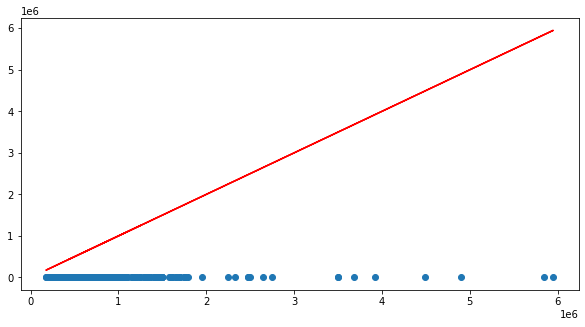

In [ ]:
# change some hidden layer activation function from relu to tanh
model = Sequential()
model.add(Dense(17,activation='tanh'))
model.add(Dense(17,activation='tanh'))
model.add(Dense(17,activation='tanh'))
model.add(Dense(17,activation='tanh'))
model.add(Dense(1))
model.compile(optimizer='Adam',loss='mse')
#train
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=16,epochs=600)
model.summary()
y_pred = model.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
# Perfect predictions
plt.plot(y_test,y_test,'r')

Epoch 1/600
12/12 [==============================] - 1s 20ms/step - loss: 648450080768.0000 - val_loss: 684342837248.0000
Epoch 2/600
12/12 [==============================] - 0s 10ms/step - loss: 648449818624.0000 - val_loss: 684342444032.0000
Epoch 3/600
12/12 [==============================] - 0s 7ms/step - loss: 648449490944.0000 - val_loss: 684342116352.0000
Epoch 4/600
12/12 [==============================] - 0s 8ms/step - loss: 648449097728.0000 - val_loss: 684341788672.0000
Epoch 5/600
12/12 [==============================] - 0s 9ms/step - loss: 648448770048.0000 - val_loss: 684341526528.0000
Epoch 6/600
12/12 [==============================] - 0s 8ms/step - loss: 648448442368.0000 - val_loss: 684341198848.0000
Epoch 7/600
12/12 [==============================] - 0s 9ms/step - loss: 648448180224.0000 - val_loss: 684340936704.0000
Epoch 8/600
12/12 [==============================] - 0s 9ms/step - loss: 648447721472.0000 - val_loss: 684340477952.0000
Epoch 9/600
12/12 [===========

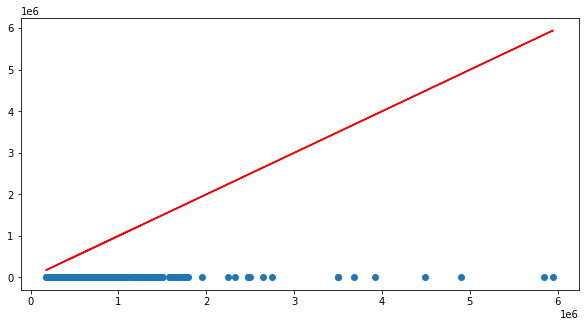

In [ ]:
# change some hidden layer activation function to sigmoid
model = Sequential()
model.add(Dense(17,activation='sigmoid'))
model.add(Dense(17,activation='sigmoid'))
model.add(Dense(17,activation='sigmoid'))
model.add(Dense(17,activation='sigmoid'))
model.add(Dense(1))
model.compile(optimizer='Adam',loss='mse')
#train
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=16,epochs=600)
model.summary()
y_pred = model.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
# Perfect predictions
plt.plot(y_test,y_test,'r')

Epoch 1/600
12/12 [==============================] - 1s 23ms/step - loss: 648383627264.0000 - val_loss: 684163399680.0000
Epoch 2/600
12/12 [==============================] - 0s 9ms/step - loss: 648153726976.0000 - val_loss: 683918295040.0000
Epoch 3/600
12/12 [==============================] - 0s 10ms/step - loss: 647846100992.0000 - val_loss: 683491393536.0000
Epoch 4/600
12/12 [==============================] - 0s 10ms/step - loss: 647228227584.0000 - val_loss: 682688118784.0000
Epoch 5/600
12/12 [==============================] - 0s 10ms/step - loss: 646091767808.0000 - val_loss: 681051815936.0000
Epoch 6/600
12/12 [==============================] - 0s 9ms/step - loss: 643712483328.0000 - val_loss: 677763809280.0000
Epoch 7/600
12/12 [==============================] - 0s 8ms/step - loss: 638996578304.0000 - val_loss: 671336300544.0000
Epoch 8/600
12/12 [==============================] - 0s 10ms/step - loss: 629943238656.0000 - val_loss: 659450888192.0000
Epoch 9/600
12/12 [========

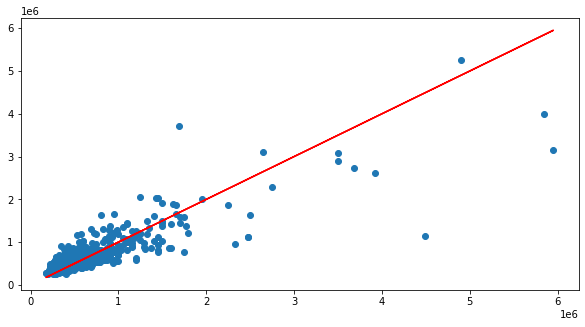

In [ ]:
# add more hidden layer and neuron 
model = Sequential()
model.add(Dense(23,activation='relu'))
model.add(Dense(23,activation='relu'))
model.add(Dense(23,activation='relu'))
model.add(Dense(23,activation='relu'))
model.add(Dense(23,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='Adam',loss='mse')
#train
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=16,epochs=600)
model.summary()
y_pred = model.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
# Perfect predictions
plt.plot(y_test,y_test,'r')

Epoch 1/600
12/12 [==============================] - 1s 19ms/step - loss: 648472756224.0000 - val_loss: 684324814848.0000
Epoch 2/600
12/12 [==============================] - 0s 8ms/step - loss: 648399486976.0000 - val_loss: 684256526336.0000
Epoch 3/600
12/12 [==============================] - 0s 10ms/step - loss: 648315011072.0000 - val_loss: 684149309440.0000
Epoch 4/600
12/12 [==============================] - 0s 10ms/step - loss: 648164278272.0000 - val_loss: 683940839424.0000
Epoch 5/600
12/12 [==============================] - 0s 9ms/step - loss: 647874871296.0000 - val_loss: 683562106880.0000
Epoch 6/600
12/12 [==============================] - 0s 9ms/step - loss: 647399997440.0000 - val_loss: 682956750848.0000
Epoch 7/600
12/12 [==============================] - 0s 9ms/step - loss: 646632505344.0000 - val_loss: 681999466496.0000
Epoch 8/600
12/12 [==============================] - 0s 8ms/step - loss: 645411831808.0000 - val_loss: 680516321280.0000
Epoch 9/600
12/12 [==========

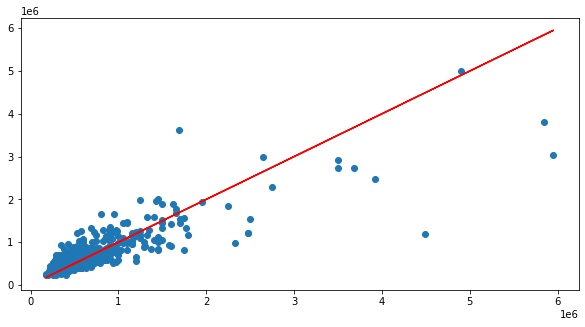

In [ ]:
# reduce some neuron 
model = Sequential()
model.add(Dense(14,activation='relu'))
model.add(Dense(14,activation='relu'))
model.add(Dense(14,activation='relu'))
model.add(Dense(14,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='Adam',loss='mse')
#train
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=16,epochs=600)
model.summary()
y_pred = model.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
# Perfect predictions
plt.plot(y_test,y_test,'r')

best model

In [ ]:
model = Sequential()
model.add(Dense(23,activation='relu'))
model.add(Dense(23,activation='relu'))
model.add(Dense(23,activation='relu'))
model.add(Dense(23,activation='relu'))
model.add(Dense(23,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='Adam',loss='mse')
#train
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=16,epochs=300)
model.summary()

Epoch 1/300
12/12 [==============================] - 1s 19ms/step - loss: 648318418944.0000 - val_loss: 684121260032.0000
Epoch 2/300
12/12 [==============================] - 0s 10ms/step - loss: 648115781632.0000 - val_loss: 683865473024.0000
Epoch 3/300
12/12 [==============================] - 0s 8ms/step - loss: 647784562688.0000 - val_loss: 683414257664.0000
Epoch 4/300
12/12 [==============================] - 0s 10ms/step - loss: 647165313024.0000 - val_loss: 682554359808.0000
Epoch 5/300
12/12 [==============================] - 0s 10ms/step - loss: 645921767424.0000 - val_loss: 680904097792.0000
Epoch 6/300
12/12 [==============================] - 0s 10ms/step - loss: 643632857088.0000 - val_loss: 677634834432.0000
Epoch 7/300
12/12 [==============================] - 0s 10ms/step - loss: 638960599040.0000 - val_loss: 671319916544.0000
Epoch 8/300
12/12 [==============================] - 0s 9ms/step - loss: 630214819840.0000 - val_loss: 659649134592.0000
Epoch 9/300
12/12 [=======

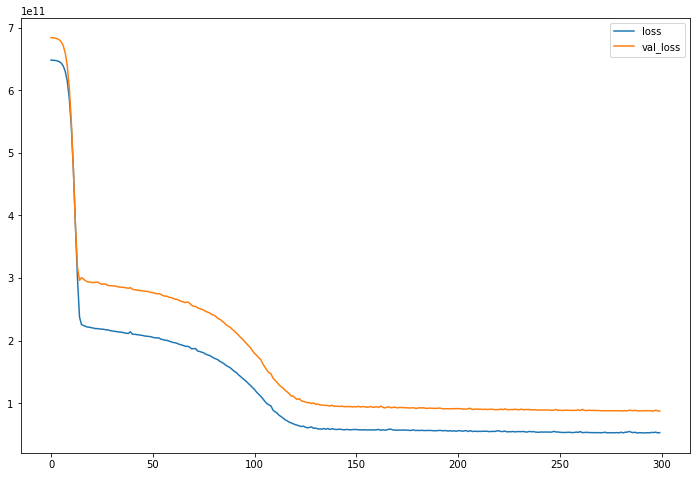

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))

MAE: 167652.72823963995
MSE: 87579382750.32916
RMSE: 295938.1400737816
VarScore: 0.7125865437329687


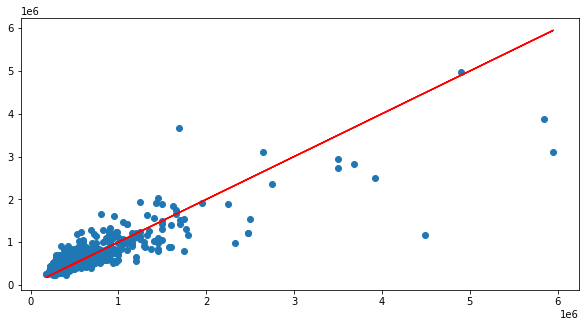

In [ ]:
y_pred = model.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
# Perfect predictions
plt.plot(y_test,y_test,'r')